In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Code for Figures in chapter 3.1

In [5]:
orders_features = catalog.load("orders_features")
orders_train = catalog.load("orders_train")
orders_test = catalog.load("orders_test")

2022-05-10 22:03:48,590 - kedro.io.data_catalog - INFO - Loading data from `orders_features` (PickleDataSet)...
2022-05-10 22:03:49,876 - kedro.io.data_catalog - INFO - Loading data from `orders_train` (CSVDataSet)...
2022-05-10 22:03:50,530 - kedro.io.data_catalog - INFO - Loading data from `orders_test` (CSVDataSet)...


In [6]:
orders_features['train_test']["itemID"].nunique()

3011

In [7]:
orders_train

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
2,3,2012-04-01,2012-04-03,71,9+,curry,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1
3,4,2012-04-02,?,22,m,green,14,39.90,808,Mrs,1959-11-09,Saxony,2012-01-04,0
4,5,2012-04-02,1990-12-31,151,39,black,53,29.90,825,Mrs,1964-07-11,Rhineland-Palatinate,2011-02-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481087,481088,2013-03-31,2013-04-09,2561,39+,blue,1,139.90,7032,Mr,1962-12-17,Lower Saxony,2011-03-12,1
481088,481089,2013-03-31,2013-04-02,2669,39,grey,18,130.00,86610,Mrs,?,Berlin,2012-03-24,0
481089,481090,2013-03-31,1990-12-31,2458,XXL,black,5,99.90,86611,Mr,1973-05-16,Berlin,2013-03-31,0
481090,481091,2013-03-31,1990-12-31,2659,XXL,black,49,99.90,86611,Mr,1973-05-16,Berlin,2013-03-31,0


In [8]:
orders_features = catalog.load("orders_features")
orders_train = catalog.load("orders_train")
orders_test = catalog.load("orders_test")

ret_basketsize = orders_features["train_test"].groupby("basketNArts")["returnShipment"].mean()

count_basketsize =  orders_features["train_test"]["basketNArts"].value_counts().sort_index()

no_arts = np.sort(orders_features["train_test"]["basketNArts"].unique())

2022-05-10 22:03:50,620 - kedro.io.data_catalog - INFO - Loading data from `orders_features` (PickleDataSet)...
2022-05-10 22:03:51,538 - kedro.io.data_catalog - INFO - Loading data from `orders_train` (CSVDataSet)...
2022-05-10 22:03:52,155 - kedro.io.data_catalog - INFO - Loading data from `orders_test` (CSVDataSet)...


In [9]:
orders_features["train_test"].columns[:25]

Index(['weekdayOrdered', 'weekdayReceived', 'weDelivery', 'accOldSys', 'color',
       'size', 'userAgeImp', 'customerID', 'manufacturerID', 'salutation',
       'state', 'monthOrdered', 'itemID', 'price', 'discount', 'basket_price',
       'basketNArts', 'durationDelivery', 'accAgeAtOrder', 'UserAgeOrder',
       'returnShipment', 'val_set', 'budgets', 'customerIDCatboost',
       'manufacturerIDCatboost'],
      dtype='object')

In [10]:
max(orders_features["train_test"]["accAgeAtOrder"])

804

In [12]:
# test = orders[orders["val_set"]==1]
# train = orders[orders["val_set"]==0]


In [ ]:
non_match_item = train[~train["itemID"].isin(test["itemID"])]["itemID"].unique()

In [ ]:
counts = orders[orders["itemID"].isin(non_match_item)]["itemID"].value_counts()

In [ ]:
counts.sum()
171224/train.shape[0]

In [ ]:
counts[counts>100].sum()

In [13]:
140083/train.shape[0]

NameError: name 'train' is not defined

## KPIs

In [ ]:
orders = catalog.load("orders_full")
orders.loc[:, "orderDate"] = pd.to_datetime(orders["orderDate"])
orders.loc[:, "deliveryDate"] = pd.to_datetime(orders["deliveryDate"])

delivery_median = ((orders["deliveryDate"]-orders["orderDate"]).dt.days).median()
delivery_median

In [14]:
# orders_features["train_test"]

In [15]:
# average price
orders["price"].mean()

NameError: name 'orders' is not defined

In [ ]:
orders = catalog.load("orders_full")

orders["basketID"] = orders["customerID"].astype(str) + orders["orderDate"].astype(str)
ret_basket = orders.groupby("basketID")["returnShipment"].mean()
basket_sizes = orders.groupby("basketID").size()
# drop baskets with less than 2 items
basket_sizes = basket_sizes[basket_sizes>2]
# only returns
ret_basket = ret_basket[ret_basket>0]
match = basket_sizes[basket_sizes.index.isin(ret_basket.index)]
ret_basketes_items = orders[(orders["basketID"].isin(match.index))&
                           (orders["returnShipment"]==1)]

data = ret_basket.loc[ret_basketes_items["basketID"]]
print(item_avg_basket[item_avg_basket>0.5].shape[0],
      item_avg_basket[item_avg_basket<0.5].shape[0],
      item_avg_basket[item_avg_basket==0.5].shape[0])

In [ ]:
print(item_avg_basket[item_avg_basket>0.5].shape[0],
      item_avg_basket[item_avg_basket<0.5].shape[0],
      item_avg_basket[item_avg_basket==0.5].shape[0])

In [ ]:
1- 35421 / (161896 + 17390)

In [16]:
item_avg_basket = ret_basket.loc[ret_basketes_items["basketID"]]
orders["returnShipment"].sum()

NameError: name 'ret_basket' is not defined

In [ ]:
plt.hist(data*100, bins=20)

plt.ylabel("Amount of return items", fontsize=12)
plt.xlabel("avg-RSs of items in the basket DMC14 dataset", fontsize=12)



In [ ]:
print(ret_basket.loc[ret_basketes_items["basketID"]].shape)
item_avg_basket = ret_basket.loc[ret_basketes_items["basketID"]]
item_avg_basket[item_avg_basket>=0.5]

In [17]:
# optional: density function
from scipy.stats import kde

density = kde.gaussian_kde(data)
x = np.linspace(0,1,300)
y=density(x)
plt.plot(x, y)

NameError: name 'data' is not defined

In [18]:
(orders.groupby("customerID")["basketID"].nunique().sort_values()==1).mean()

NameError: name 'orders' is not defined

In [ ]:
orders.groupby("customerID")["basketID"].nunique().sort_values().mean()

In [ ]:
orders[["basketID", "itemID"]].duplicated(keep=False).sum()

In [19]:
orders[["basketID", "itemID"]].duplicated(keep=False).sum() / orders.shape[0]

NameError: name 'orders' is not defined

In [ ]:
orders[orders[["basketID", "itemID"]].duplicated(keep=False)]["returnShipment"].mean()

In [ ]:
orders["returnShipment"].mean()

In [20]:
orders.columns

NameError: name 'orders' is not defined

In [ ]:
orders.loc[:, "creationDate"] = pd.to_datetime(orders["creationDate"])
min(orders["creationDate"])

In [ ]:
old_cust = orders[orders["creationDate"]==min(orders["creationDate"])].customerID.unique()

In [21]:
len(old_cust)/ orders.customerID.nunique()

NameError: name 'old_cust' is not defined

In [ ]:
sum(avg_ret_dict.values())

In [ ]:
diffs = orders_grp["sum"].value_counts().sort_index().iloc[:27] - pd.Series(avg_ret_dict)
# diffs*range(1, len(diffs)+1)

In [22]:
orders_grp["sum"].value_counts()

NameError: name 'orders_grp' is not defined

In [ ]:
nullsum = orders.groupby("basketID")["returnShipment"].agg(['sum', 'count'])
nullsum = nullsum[nullsum["sum"]==0]

In [ ]:
nullsum["count"].value_counts().iloc[:10]

In [23]:
import scipy
from scipy.stats import binom

In [24]:
i = 0
no_ret_baskets = {}
for index in indices[i:]: 
    p1 = binom.pmf(i, index, ret_basketsize.loc[index])
    no_ret_baskets[index] = p1 * count_basketsize.loc[index]/index

NameError: name 'indices' is not defined

In [ ]:
x = np.arange(2, 11)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nullsum["count"].value_counts().iloc[1:10] * range(2,11),
                width, label='Amount of items not returned', color = "tab:olive")
rects2 = ax.bar(x + width/2, pd.Series(no_ret_baskets).iloc[1:10]* range(2,11),
                width, label='Mathematical average from binomial', color = "tab:cyan")
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
ax.set_xticks(x, x)
ax.legend()
fig.tight_layout()

plt.show()

In [ ]:
orders = catalog.load("orders_full")

orders_grp = orders.groupby("basketID")["returnShipment"].agg(['sum', 'count'])
orders_grp = orders_grp[orders_grp["sum"]!=0]


indices = ret_basketsize.index
avg_ret_dict = {}
for i in range(1, 28):
    avg_rets = 0
    for index in indices[i-1:]: 
        p1 = binom.pmf(i, index, ret_basketsize.loc[index])
        # print(i, index, p1, count_basketsize.loc[index])
        avg_rets += p1 * (count_basketsize.loc[index]/index)
    avg_ret_dict[i] = avg_rets

In [25]:
rand_ret_binom = pd.Series(avg_ret_dict).iloc[:15]
real_rets = orders_grp["sum"].value_counts().iloc[:15]

NameError: name 'avg_ret_dict' is not defined

In [ ]:
x = np.arange(1, 16)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, rand_ret_binom * range(1,16), width, label='Random')
rects2 = ax.barh(x + width/2, real_rets* range(1,16), width, label='Real')
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
ax.set_yticks(x, x)
ax.legend()
fig.tight_layout()

plt.show()

# Figures 
## Figure binominal difference

In [ ]:
"""i = 10
avg_rets_10 = {}
for index in indices[i-1:]: 
    p1 = binom.pmf(i, index, ret_basketsize.loc[index])
    # print(i, index, p1, count_basketsize.loc[index])
    avg_rets_10[str(index)] = p1 * (count_basketsize.loc[index]/index)"""

In [26]:
import scipy
from scipy.stats import binom
# https://medium.com/codex/binomial-distribution-probability-tutorial-with-python-677cc1dcb18d
    # https://docs.scipy.org/doc/scipy/tutorial/stats/discrete_binom.html
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
print(orders_grp["sum"].value_counts().loc[1])
print(orders_grp[orders_grp["count"]>1]["sum"].value_counts().loc[1])

indices = ret_basketsize.index
avg_ret_dict = {}
for i in range(1, 28):
    avg_rets = 0
    # for index in indices[i-1:]:
    index = 27    
    p1 = binom.pmf(i, index, ret_basketsize.loc[index])
    print(i, index, p1, count_basketsize.loc[index])
    avg_rets += p1 * count_basketsize.loc[index]
    avg_ret_dict[i] = avg_rets
    
# p_1 = factorial(index)/((factorial(i)*factorial(index-i)))*ret_basketsize.loc[index]**i*(1-ret_basketsize.loc[index])**(index-i)
# p_1 * count_basketsize[index]

# factorial(count_basketsize.loc[1])/factorial(count_basketsize.loc[1]-1) * (1-ret_basketsize.loc[1])**index

"""
indices = ret_basketsize.index
avg_returns = 0
for index in indices[1:]:
    p_1 = factorial(index)/factorial(index-1)*ret_basketsize.loc[index]*(1-ret_basketsize.loc[index])**index
    avg_returns += p_1 * count_basketsize[index]"""

NameError: name 'orders_grp' is not defined

In [ ]:
avg_rets = {}
real_rets = {}
for index in range(2,11):
    avg_rets[index] = {}
    grouped = orders.groupby("basketID")["returnShipment"].agg(['sum', 'count'])
    real_rets[index] = grouped[grouped["count"]==index]["sum"].value_counts().sort_index()
    for i in range(0,index+1): 
        p1 = binom.pmf(i, index, ret_basketsize.loc[index])
        # print(i, index, p1, count_basketsize.loc[index])
        if i == 0:
            avg_rets[index][i] = p1 * count_basketsize.loc[index]
        else:
            avg_rets[index][i] = p1 * (count_basketsize.loc[index]/index)

In [ ]:
incides = range(2,11)
no_rets = pd.Series(index = incides, dtype=float)
no_rets_av = pd.Series(index = incides, dtype=float)
rets_diff = {}

for index in incides:
    no_rets_av.loc[index] = avg_rets[index][0]
    no_rets.loc[index] = real_rets[index][0]
    avg_index = (pd.Series(avg_rets[index])*range(len(avg_rets[index]))).loc[1:]
    real_rets_index = (pd.Series(real_rets[index])*range(len(real_rets[index]))).loc[1:]
    rets_diff[index] = real_rets_index - avg_index

In [30]:
# mcolors.TABLEAU_COLORS

NameError: name 'rets_diff' is not defined

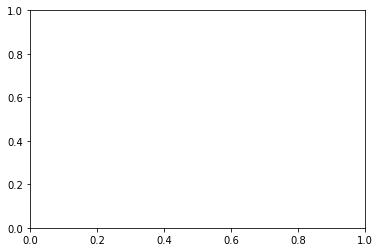

In [31]:
import matplotlib.colors as mcolors
colors = pd.Series(mcolors.TABLEAU_COLORS.keys())

N = 4 
ind = np.arange(1, 6)  # the label locations
width = 0.15

bars = {}
i = 0
fig, ax = plt.subplots()

for index in range(2, 6):
    
    data = pd.Series(rets_diff[index], index = ind).fillna(0)
    bars[index] = plt.bar(ind + i*width, data.to_numpy(), width, label = "basket size =" + str(index), color = colors[i])
    mode = (pd.Series(avg_rets[index])*range(len(avg_rets[index]))).loc[1:].idxmax()
    plt.axvline(mode+ i*width, linestyle="--", color = colors[i])
    i+=1

# rects1 = ax.barh(x - width/2, rand_ret_binom * range(1,16), width, label='Random')
# rects2 = ax.barh(x + width/2, real_rets* range(1,16), width, label='Real')
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
plt.axvline(0, linestyle="--", color = "grey", label = "basket mode RSs")
plt.xlim(ind[0]-width, ind[-1]+1)
ax.set_xticks(ind + 1.5*width, ind)
ax.legend(fontsize=10)
fig.tight_layout()
plt.ylabel("Binomial difference", fontsize=12)
plt.xlabel("Number of RSs in basket ($k$)", fontsize=12)
plt.show()

In [ ]:
N = 5 
ind = np.arange(1, 11)  # the label locations
width = 0.15

bars = {}
i = 0
fig, ax = plt.subplots()

for index in range(6, 11):
    
    data = pd.Series(rets_diff[index], index = ind).fillna(0)
    bars[index] = plt.bar(ind + i*width, data.to_numpy(), width, label = "basket size = " + str(index), color = colors[i])
    mode = (pd.Series(avg_rets[index])*range(len(avg_rets[index]))).loc[1:].idxmax()
    plt.axvline(mode+ i*width, linestyle="--", color = colors[i])
    i+=1


# rects1 = ax.barh(x - width/2, rand_ret_binom * range(1,16), width, label='Random')
# rects2 = ax.barh(x + width/2, real_rets* range(1,16), width, label='Real')
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
plt.axvline(0, linestyle="--", color = "grey", label = "basket mode RSs")
plt.xlim(ind[0]-width, ind[-1]+1.25)
ax.set_xticks(ind + 2*width, ind)
ax.legend(fontsize=10)
fig.tight_layout()
plt.ylabel("Binomial difference", fontsize=12)
plt.xlabel("Number of RSs in the basket ($k$)", fontsize=12)

plt.show()

## Figure dmc data 

In [ ]:
plt.get_cmap("tab10")

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.bar(no_arts, count_basketsize) # , color="green", marker="o"
# set x-axis label
ax.set_xlabel("Number of items in the basket",fontsize=12)
# set y-axis label
ax.set_ylabel("Total amount of items ordered",fontsize=12)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(no_arts, ret_basketsize*100,color="tab:orange", marker="x")
ax2.set_ylabel("Average return percentage",color="tab:orange",fontsize=12)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax2.set_ylim(0, 100)
plt.axhline(mean_retp*100, color="tab:orange", linestyle="--", label="dataset-level")
plt.legend(fontsize=10)
plt.show()

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.bar(no_arts[:16], count_basketsize.loc[:16]) # , color="green", marker="o"
# set x-axis label
ax.set_xlabel("Number of items in the basket",fontsize=12)
# set y-axis label
ax.set_ylabel("Total amount of items ordered",fontsize=12)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(no_arts[:16], ret_basketsize.loc[:16] ,color="tab:orange", marker="x")
ax2.set_ylabel("Average return percentage",color="tab:orange",fontsize=12)
ax2.set_ylim(0, 0.7)
plt.show()

In [ ]:
fig,ax = plt.subplots()
# make a plot
ax.bar(no_arts[:27], count_basketsize.loc[:27]) # , color="green", marker="o"
# set x-axis label
ax.set_xlabel("Number of items in the basket",fontsize=12)
# set y-axis label
ax.set_ylabel("Total amount of items ordered",fontsize=12)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(no_arts[:27], ret_basketsize.loc[:27]*100 ,color="tab:orange", marker="x")
ax2.set_ylabel("Average percentage of RSs",color="tab:orange",fontsize=12)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax2.set_ylim(0, 80)
plt.axhline(mean_retp*100, color="tab:orange", linestyle="--", label="dataset-level")
plt.legend(fontsize=10)
plt.show()

### Appendix: Old Figures

In [ ]:
for index in [3, 5, 7, 9]:
    multi = np.append(np.arange(1), np.arange(len(avg_rets[index])-1))+1
    
    plt.plot(pd.Series(avg_rets[index])*multi, label = "binominal " + str(index))


In [ ]:
import matplotlib.colors as mcolors
colors = pd.Series(mcolors.TABLEAU_COLORS.keys())

for index in range(3,6):
    multi = np.append(np.arange(1), np.arange(len(avg_rets[index])-1))+1
    plt.plot(real_rets[index]*multi, label = "basket size " + str(index), color = colors.iloc[index-3]) # "dataset " + str(index) + " items returned"
    plt.plot(pd.Series(avg_rets[index])*multi, color = colors.iloc[index-3], linestyle="--") # label = "binominal " + str(index)
# plt.legend(fontsize=10)
plt.ylim(0, 15000)
plt.legend(fontsize=10)

In [ ]:
import matplotlib.colors as mcolors
colors = pd.Series(mcolors.TABLEAU_COLORS.keys())

for index in range(3,7):
    multi = np.arange(len(avg_rets[index])-1)+1
    plt.plot(real_rets[index].loc[1:]*multi, label = "basket size " + str(index), color = colors.iloc[index-3], alpha=0.75) # "dataset " + str(index) + " items returned"
    plt.plot(pd.Series(avg_rets[index]).loc[1:]*multi, color = colors.iloc[index-3], linestyle="--", alpha=0.75) # label = "binominal " + str(index)
# plt.legend(fontsize=10)
plt.ylim(0, 15000)
plt.legend(fontsize=10)

In [ ]:
for index in range(8,11):
    multi = np.append(np.arange(1), np.arange(len(avg_rets[index])-1))+1
    plt.plot(real_rets[index]*multi, label = "basket size " + str(index), color = colors.iloc[index-3])
    plt.plot(pd.Series(avg_rets[index])*multi, linestyle="--", color = colors.iloc[index-3])
# legend_elements = [Line2D([0], [0], color='b', linestyle="--", label='binominal'),
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend                   
plt.legend(fontsize=10)


In [ ]:
zeros = []
for index in avg_rets.keys():
    zeros += [avg_rets[index][0]]
pd.Series(zeros * np.arange(1, len(zeros)+1), index = avg_rets.keys())

In [ ]:
real_zeros = []
for index in real_rets.keys():
    real_zeros += [nullsum[nullsum["count"]==index].shape[0]]
pd.Series(real_zeros*np.arange(1, len(real_zeros)+1), index = real_rets.keys())

In [ ]:
# count_basketsize.cumsum() > 525716.73

In [ ]:
for column in orders_train:
    print(column, orders_train[orders_train[column]=="?"].shape)